In [ ]:
!pip install kaggle

In [ ]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

# Create the config folder and file so the kaggle CLI works
!mkdir -p ~/.kaggle
!echo '{"username":"'$KAGGLE_USERNAME'","key":"'$KAGGLE_KEY'"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

print("Successfully configured Kaggle!")

Successfully configured Kaggle!


In [ ]:
# DESIESE DATASET
# Dependencies:
import kagglehub
import pandas
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load (find it on the respective dataset page in kaggle)
file_path = "maryamlsgumel/drone-detection-dataset"

# Load the latest version
DataFrame = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "meruvakodandasuraj/gene-expression-dataset-for-disease-classification",
  file_path,
)

print("First 5 records:", DataFrame.head())

Using Colab cache for faster access to the 'gene-expression-dataset-for-disease-classification' dataset.
First 5 records:      GENE_1    GENE_2    GENE_3    GENE_4    GENE_5    GENE_6    GENE_7  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -1.907808 -0.860385 -0.413606  1.887688  0.556553 -1.335482  0.486036   
2 -1.114081 -0.630931 -0.942060 -0.547996 -0.214150  0.837154 -0.321159   
3  0.765402  1.073413  0.498690 -1.942498 -0.155422 -1.155708 -0.202606   
4  1.174814 -1.878981 -0.327795 -0.041660  0.015909  0.180496  0.610440   

     GENE_8    GENE_9   GENE_10  ...  GENE_2992  GENE_2993  GENE_2994  \
0  0.767435 -0.469474  0.542560  ...   0.602118   0.072037   1.619463   
1 -1.547304  1.082691 -0.471125  ...   0.306389  -0.998307   0.518793   
2 -1.585626  1.140068 -0.837090  ...   0.891841  -0.154650  -1.813293   
3  0.980004  0.305151  1.148091  ...  -1.451104  -0.406151  -0.946983   
4 -0.035407 -0.368058 -0.407589  ...   0.913391   0.212300   2

In [ ]:
# PLANES VS DRONES VS BIRDS DATASET
# Dependencies:
import kagglehub
import os
import cv2 as OpenCV
import numpy

# Download the dataset
dataset_path = kagglehub.dataset_download("maryamlsgumel/drone-detection-dataset")

base_path = os.path.join(dataset_path, "BirdVsDroneVsAirplane")

# Navigate to the folder (update the path if the folder name is different)
data_dir = './drone-detection-dataset'

# important consts
data = []
labels = []
# hight and width of img after transformation
img_width = 255
img_height = 255

# Mapping folders to labels
# !!! category names need to be the same as folder names in the dataset because of how we travverse and translate data from directories!!!
categories = {'Birds': 1, 'Drones': 2, 'Aeroplanes': 3}

for folder_name, label in categories.items():
    # Use the path variable from kagglehub
    category_path = os.path.join(base_path, folder_name)

    if not os.path.isdir(category_path):
        print(f"Directory not found: {category_path}")
        continue

    print(f"Processing {folder_name}...")

    for img_name in os.listdir(category_path):
        # Skip system files and only keep images (skip thumb.db etc.)
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        try:
            img_full_path = os.path.join(category_path, img_name)

            # Use OpenCV
            img = OpenCV.imread(img_full_path)

            if img is not None:
                # Resize to a standard size
                img = OpenCV.resize(img, (img_width, img_height))

                # Normalize pixels to range [0, 1]
                pixels = img.astype('float32') / 255.0

                data.append(pixels)
                labels.append(label)
        except Exception as e:
            print(f"Error loading {img_name}: {e}")

X = numpy.array(data)
y = numpy.array(labels)

print(f"---")
print(f"Finished! Total images: {len(X)}")
print(f"X shape: {X.shape}") # (N, 64, 64, 3)
print(f"y shape: {y.shape}") # (N,)

Using Colab cache for faster access to the 'drone-detection-dataset' dataset.
Processing Birds...
Processing Drones...
Processing Aeroplanes...
---
Finished! Total images: 2356
X shape: (2356, 255, 255, 3)
y shape: (2356,)


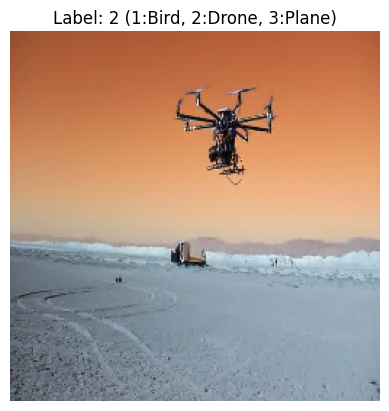

In [ ]:
# display random img to check if eveything worked
import matplotlib.pyplot as plt
import random

# Pick a random index
idx = random.randint(0, len(X)-1)

# Display the image and its label
plt.imshow(X[idx])
plt.title(f"Label: {y[idx]} (1:Bird, 2:Drone, 3:Plane)")
plt.axis('off')
plt.show()